In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## IA alloy surface and bulk comparison from TD-EBSD

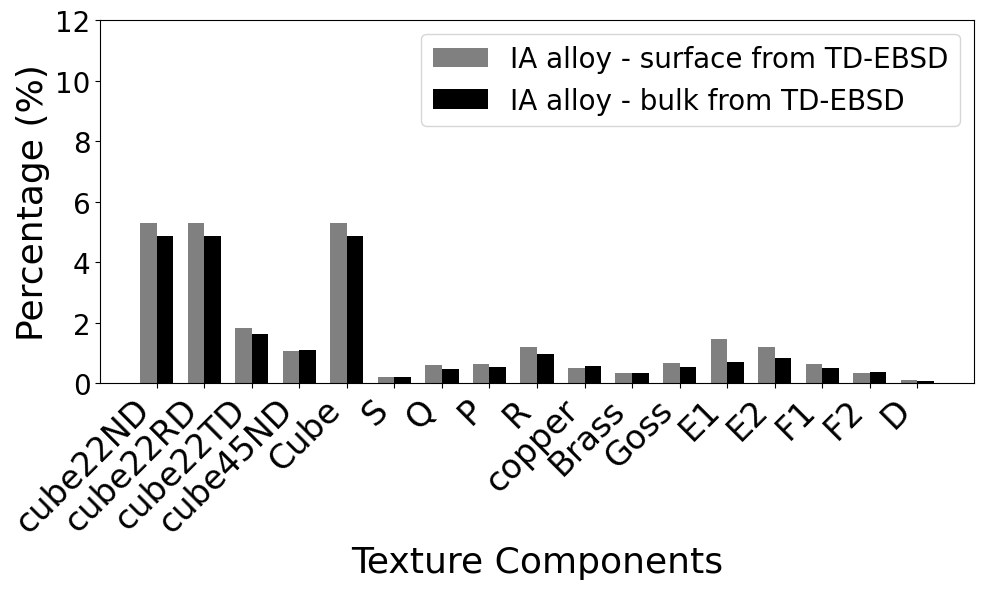

In [20]:
# Read BA data
df_ba = pd.read_csv("2D/BA_TD_texture_components_surface.csv")
df_ba.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba = df_ba[df_ba["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba = df_ba[df_ba["TextureComponent"] != "Total"]            # remove the "Total" row

# Read No BA data
df_no_ba = pd.read_csv("2D/BA_TD_texture_components_bulk.csv")
df_no_ba.dropna(subset=["TextureComponent"], inplace=True)
df_no_ba = df_no_ba[df_no_ba["TextureComponent"].str.strip().ne("")]
df_no_ba = df_no_ba[df_no_ba["TextureComponent"] != "Total"]

# --- Merge the two DataFrames on 'TextureComponent' ---
df_merged = pd.merge(df_ba, df_no_ba, on="TextureComponent", how="outer", suffixes=("_BA", "_NoBA"))
df_merged.fillna(0, inplace=True)

# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)


# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba = df_merged["Percentage_BA"]
percent_no_ba = df_merged["Percentage_NoBA"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# BA bars in black
bars_ba = ax.bar(x - bar_width/2, percent_ba, bar_width, label="IA alloy - surface from TD-EBSD", color="grey")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x + bar_width/2, percent_no_ba, bar_width, label="IA alloy - bulk from TD-EBSD", color="black")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=26)
ax.set_ylabel("Percentage (%)", fontsize=26)

ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=24)
ax.tick_params(axis='y', labelsize=20)
ax.legend(fontsize=20)

ax.set_ylim([0, 12])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("IA-TD_texture_components.png")

plt.show()


## No IA alloy surface and bulk comparison

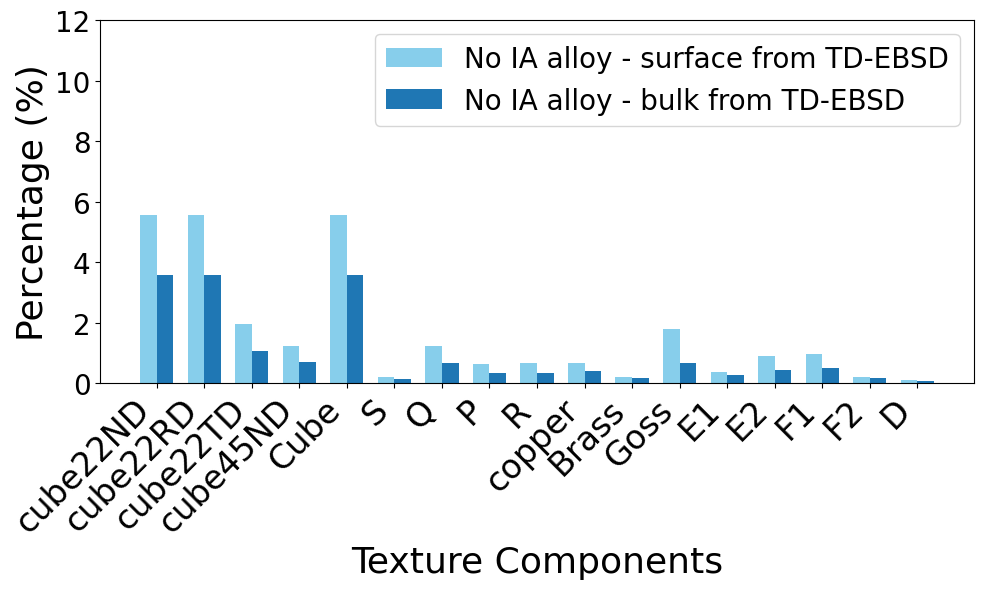

In [21]:
# Read 3D data
df_ba = pd.read_csv("2D/NoBA_TD_texture_components_surface.csv")
df_ba.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba = df_ba[df_ba["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba = df_ba[df_ba["TextureComponent"] != "Total"]            # remove the "Total" row

# --- Read and clean No BA data ---
df_no_ba = pd.read_csv("2D/NoBA_TD_texture_components_bulk.csv")
df_no_ba.dropna(subset=["TextureComponent"], inplace=True)
df_no_ba = df_no_ba[df_no_ba["TextureComponent"].str.strip().ne("")]
df_no_ba = df_no_ba[df_no_ba["TextureComponent"] != "Total"]

# --- Merge the two DataFrames on 'TextureComponent' ---
df_merged = pd.merge(df_ba, df_no_ba, on="TextureComponent", how="outer", suffixes=("_BA", "_NoBA"))
df_merged.fillna(0, inplace=True)

# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)
# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba = df_merged["Percentage_BA"]
percent_no_ba = df_merged["Percentage_NoBA"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# BA bars in black
bars_ba = ax.bar(x - bar_width/2, percent_ba, bar_width, label="No IA alloy - surface from TD-EBSD", color="skyblue")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x + bar_width/2, percent_no_ba, bar_width, label="No IA alloy - bulk from TD-EBSD")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=26)
ax.set_ylabel("Percentage (%)", fontsize=26)
ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=24)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20)

ax.set_ylim([0, 12])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("NoIA-TD_texture_components.png")

plt.show()


## IA alloy - surface vs bulk comparison from RD EBSD

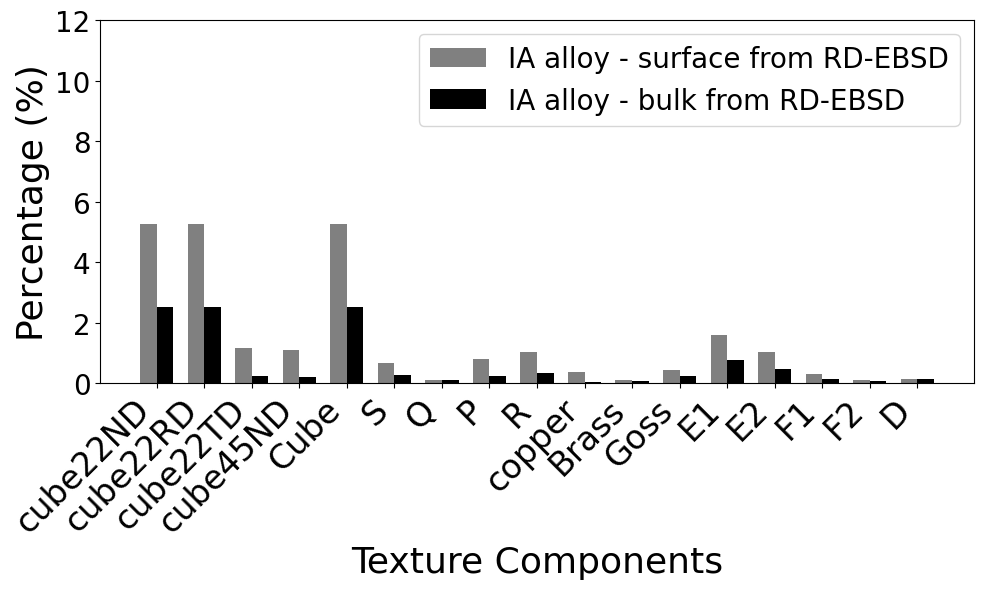

In [22]:
# Read BA data
df_ba = pd.read_csv("2D/BA_RD_texture_components_surface.csv")
df_ba.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba = df_ba[df_ba["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba = df_ba[df_ba["TextureComponent"] != "Total"]            # remove the "Total" row

# Read No BA data
df_no_ba = pd.read_csv("2D/BA_RD_texture_components_bulk.csv")
df_no_ba.dropna(subset=["TextureComponent"], inplace=True)
df_no_ba = df_no_ba[df_no_ba["TextureComponent"].str.strip().ne("")]
df_no_ba = df_no_ba[df_no_ba["TextureComponent"] != "Total"]

# --- Merge the two DataFrames on 'TextureComponent' ---
df_merged = pd.merge(df_ba, df_no_ba, on="TextureComponent", how="outer", suffixes=("_BA", "_NoBA"))
df_merged.fillna(0, inplace=True)

# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)


# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba = df_merged["Percentage_BA"]
percent_no_ba = df_merged["Percentage_NoBA"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# BA bars in black
bars_ba = ax.bar(x - bar_width/2, percent_ba, bar_width, label="IA alloy - surface from RD-EBSD", color="grey")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x + bar_width/2, percent_no_ba, bar_width, label="IA alloy - bulk from RD-EBSD", color="black")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=26)
ax.set_ylabel("Percentage (%)", fontsize=26)

ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=24)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20)

ax.set_ylim([0, 12])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("IA-RD_texture_components.png")

plt.show()


## No IA alloy - surface vs bulk comparison from RD EBSD

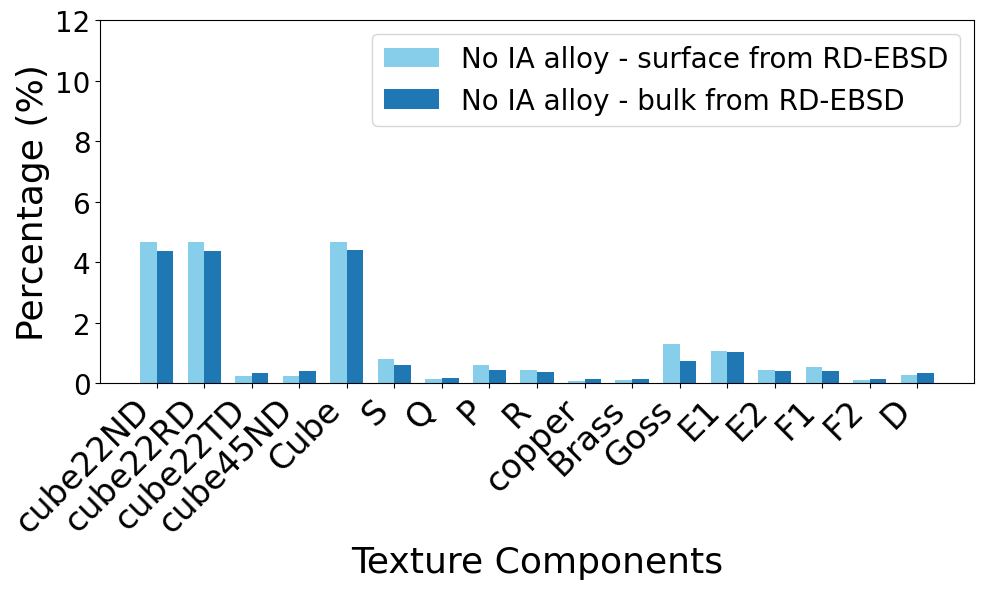

In [23]:
# Read 3D data
df_ba = pd.read_csv("2D/NoBA_RD_texture_components_surface.csv")
df_ba.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba = df_ba[df_ba["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba = df_ba[df_ba["TextureComponent"] != "Total"]            # remove the "Total" row

# --- Read and clean No BA data ---
df_no_ba = pd.read_csv("2D/NoBA_RD_texture_components_bulk.csv")
df_no_ba.dropna(subset=["TextureComponent"], inplace=True)
df_no_ba = df_no_ba[df_no_ba["TextureComponent"].str.strip().ne("")]
df_no_ba = df_no_ba[df_no_ba["TextureComponent"] != "Total"]

# --- Merge the two DataFrames on 'TextureComponent' ---
df_merged = pd.merge(df_ba, df_no_ba, on="TextureComponent", how="outer", suffixes=("_BA", "_NoBA"))
df_merged.fillna(0, inplace=True)

# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)
# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba = df_merged["Percentage_BA"]
percent_no_ba = df_merged["Percentage_NoBA"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# BA bars in black
bars_ba = ax.bar(x - bar_width/2, percent_ba, bar_width, label="No IA alloy - surface from RD-EBSD", color="skyblue")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x + bar_width/2, percent_no_ba, bar_width, label="No IA alloy - bulk from RD-EBSD")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=26)
ax.set_ylabel("Percentage (%)", fontsize=26)
ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=24)
ax.tick_params(axis='y', labelsize=20)
ax.legend(fontsize=20)

ax.set_ylim([0, 12])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("NoIA-RD_texture_components.png")

plt.show()


## IA alloy - subsurface

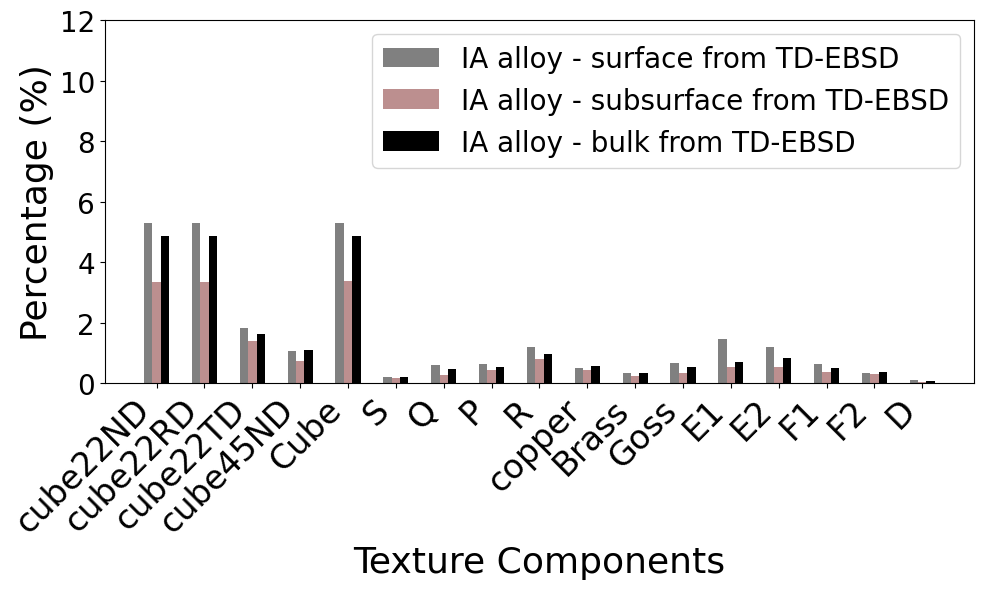

In [24]:
# Read BA data - surface
df_ba = pd.read_csv("2D/BA_TD_texture_components_surface.csv")
df_ba.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba = df_ba[df_ba["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba = df_ba[df_ba["TextureComponent"] != "Total"]            # remove the "Total" row

# Read BA data - bulk
df_no_ba = pd.read_csv("2D/BA_TD_texture_components_bulk.csv")
df_no_ba.dropna(subset=["TextureComponent"], inplace=True)
df_no_ba = df_no_ba[df_no_ba["TextureComponent"].str.strip().ne("")]
df_no_ba = df_no_ba[df_no_ba["TextureComponent"] != "Total"]

# Read BA data - subsurface
df_ba_subsurface = pd.read_csv("2D/BA_TD_subsurface_texture_components.csv")
df_ba_subsurface.dropna(subset=["TextureComponent"], inplace=True)
df_ba_subsurface = df_ba_subsurface[df_ba_subsurface["TextureComponent"].str.strip().ne("")]
df_ba_subsurface = df_ba_subsurface[df_ba_subsurface["TextureComponent"] != "Total"]

# 1) merge surface & bulk
df1 = pd.merge(
    df_ba,
    df_no_ba,
    on="TextureComponent",
    how="outer",
    suffixes=("_BA", "_NoBA")
)

# 2) merge that with subsurface
df_merged = pd.merge(
    df1,
    df_ba_subsurface,
    on="TextureComponent",
    how="outer"
)

df_merged.fillna(0, inplace=True)


# rename the new Percentage column to end in _subsurface
df_merged = df_merged.rename(columns={"Percentage": "Percentage_subsurface"})


# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)


# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba = df_merged["Percentage_BA"]
percent_no_ba = df_merged["Percentage_NoBA"]
percent_ba_subsurface = df_merged["Percentage_subsurface"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# BA bars in black
bars_ba = ax.bar(x - bar_width/2, percent_ba, bar_width/2, label="IA alloy - surface from TD-EBSD", color="grey")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x, percent_ba_subsurface, bar_width/2, label="IA alloy - subsurface from TD-EBSD", color="rosybrown")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x + bar_width/2, percent_no_ba, bar_width/2, label="IA alloy - bulk from TD-EBSD", color="black")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=26)
ax.set_ylabel("Percentage (%)", fontsize=26)

ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=24)
ax.legend(fontsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.set_ylim([0, 12])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("IA-TD-subsurface_texture_components.png")

plt.show()


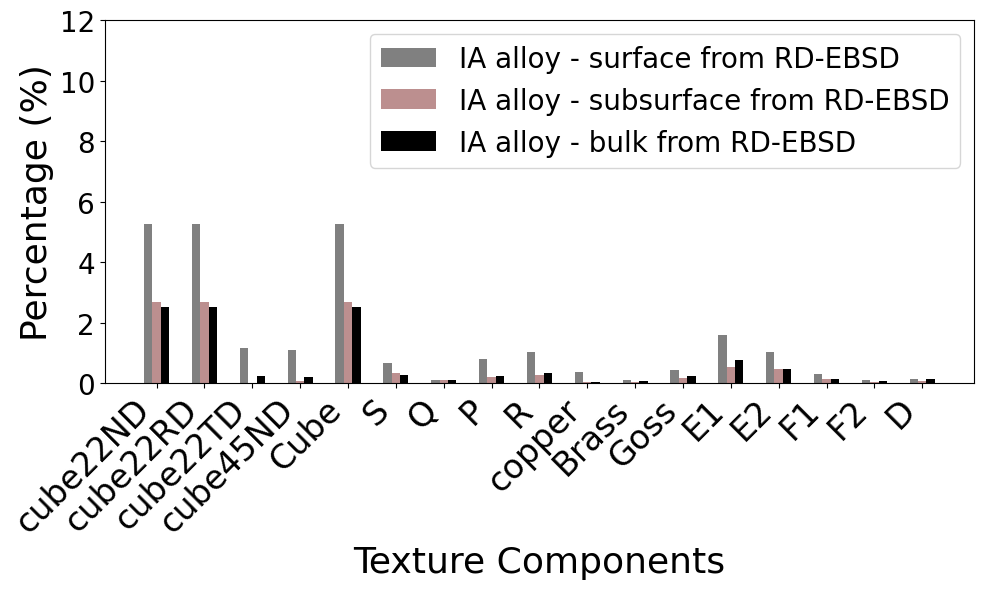

In [25]:
# Read BA data - surface
df_ba = pd.read_csv("2D/BA_RD_texture_components_surface.csv")
df_ba.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba = df_ba[df_ba["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba = df_ba[df_ba["TextureComponent"] != "Total"]            # remove the "Total" row

# Read BA data - bulk
df_no_ba = pd.read_csv("2D/BA_RD_texture_components_bulk.csv")
df_no_ba.dropna(subset=["TextureComponent"], inplace=True)
df_no_ba = df_no_ba[df_no_ba["TextureComponent"].str.strip().ne("")]
df_no_ba = df_no_ba[df_no_ba["TextureComponent"] != "Total"]

# Read BA data - subsurface
df_ba_subsurface = pd.read_csv("2D/BA_RD_subsurface_texture_components.csv")
df_ba_subsurface.dropna(subset=["TextureComponent"], inplace=True)
df_ba_subsurface = df_ba_subsurface[df_ba_subsurface["TextureComponent"].str.strip().ne("")]
df_ba_subsurface = df_ba_subsurface[df_ba_subsurface["TextureComponent"] != "Total"]

# 1) merge surface & bulk
df1 = pd.merge(
    df_ba,
    df_no_ba,
    on="TextureComponent",
    how="outer",
    suffixes=("_BA", "_NoBA")
)

# 2) merge that with subsurface
df_merged = pd.merge(
    df1,
    df_ba_subsurface,
    on="TextureComponent",
    how="outer"
)

df_merged.fillna(0, inplace=True)


# rename the new Percentage column to end in _subsurface
df_merged = df_merged.rename(columns={"Percentage": "Percentage_subsurface"})


# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)


# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba = df_merged["Percentage_BA"]
percent_no_ba = df_merged["Percentage_NoBA"]
percent_ba_subsurface = df_merged["Percentage_subsurface"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# BA bars in black
bars_ba = ax.bar(x - bar_width/2, percent_ba, bar_width/2, label="IA alloy - surface from RD-EBSD", color="grey")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x, percent_ba_subsurface, bar_width/2, label="IA alloy - subsurface from RD-EBSD", color="rosybrown")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x + bar_width/2, percent_no_ba, bar_width/2, label="IA alloy - bulk from RD-EBSD", color="black")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=26)
ax.set_ylabel("Percentage (%)", fontsize=26)

ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=24)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20)

ax.set_ylim([0, 12])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("IA-RD-subsurface_texture_components.png")

plt.show()


## No IA alloy - subsurface

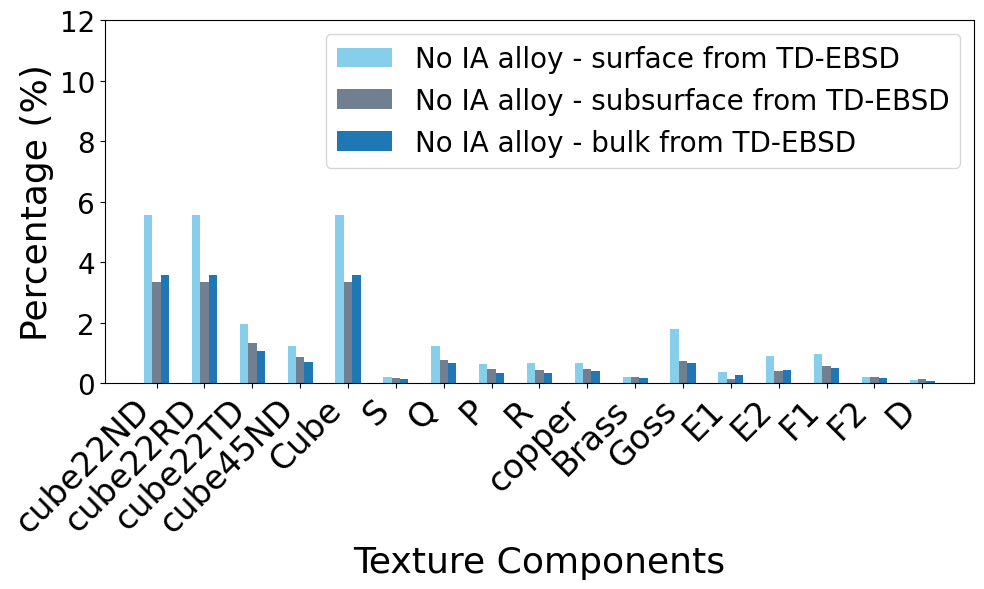

In [26]:
# Read BA data - surface
df_ba = pd.read_csv("2D/NoBA_TD_texture_components_surface.csv")
df_ba.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba = df_ba[df_ba["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba = df_ba[df_ba["TextureComponent"] != "Total"]            # remove the "Total" row

# Read BA data - bulk
df_no_ba = pd.read_csv("2D/NoBA_TD_texture_components_bulk.csv")
df_no_ba.dropna(subset=["TextureComponent"], inplace=True)
df_no_ba = df_no_ba[df_no_ba["TextureComponent"].str.strip().ne("")]
df_no_ba = df_no_ba[df_no_ba["TextureComponent"] != "Total"]

# Read BA data - subsurface
df_ba_subsurface = pd.read_csv("2D/NoBA_TD_subsurface_texture_components.csv")
df_ba_subsurface.dropna(subset=["TextureComponent"], inplace=True)
df_ba_subsurface = df_ba_subsurface[df_ba_subsurface["TextureComponent"].str.strip().ne("")]
df_ba_subsurface = df_ba_subsurface[df_ba_subsurface["TextureComponent"] != "Total"]

# 1) merge surface & bulk
df1 = pd.merge(
    df_ba,
    df_no_ba,
    on="TextureComponent",
    how="outer",
    suffixes=("_BA", "_NoBA")
)

# 2) merge that with subsurface
df_merged = pd.merge(
    df1,
    df_ba_subsurface,
    on="TextureComponent",
    how="outer"
)

df_merged.fillna(0, inplace=True)


# rename the new Percentage column to end in _subsurface
df_merged = df_merged.rename(columns={"Percentage": "Percentage_subsurface"})


# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)


# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba = df_merged["Percentage_BA"]
percent_no_ba = df_merged["Percentage_NoBA"]
percent_ba_subsurface = df_merged["Percentage_subsurface"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# BA bars in black
bars_ba = ax.bar(x - bar_width/2, percent_ba, bar_width/2, label="No IA alloy - surface from TD-EBSD", color="skyblue")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x, percent_ba_subsurface, bar_width/2, label="No IA alloy - subsurface from TD-EBSD", color="slategrey")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x + bar_width/2, percent_no_ba, bar_width/2, label="No IA alloy - bulk from TD-EBSD")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=26)
ax.set_ylabel("Percentage (%)", fontsize=26)

ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=24)
ax.legend(fontsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.set_ylim([0, 12])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("NoIA-TD-subsurface_texture_components.png")

plt.show()


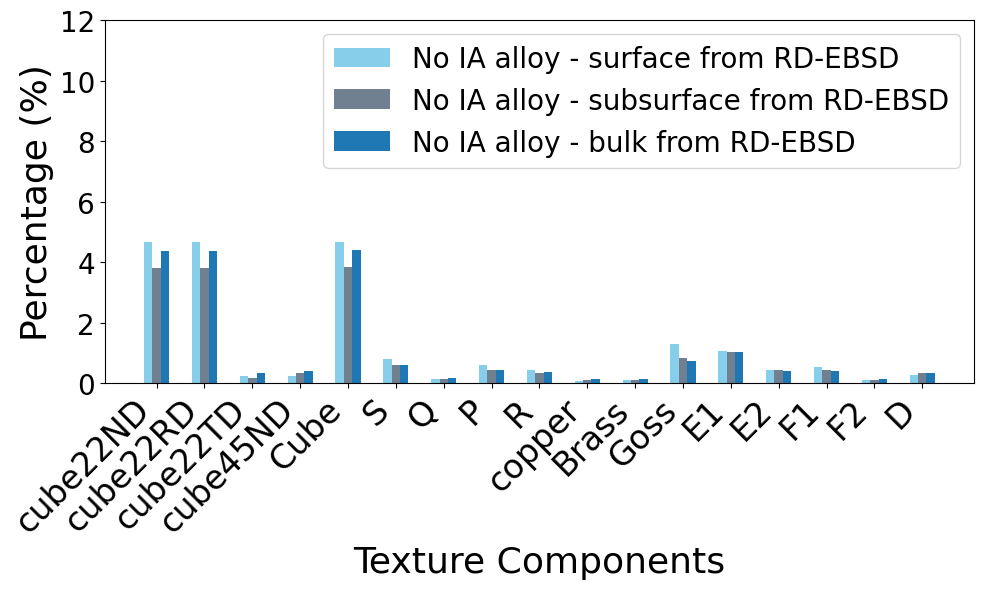

In [27]:
# Read BA data - surface
df_ba = pd.read_csv("2D/NoBA_RD_texture_components_surface.csv")
df_ba.dropna(subset=["TextureComponent"], inplace=True)  # drop empty rows
df_ba = df_ba[df_ba["TextureComponent"].str.strip().ne("")]    # remove rows with blank spaces
df_ba = df_ba[df_ba["TextureComponent"] != "Total"]            # remove the "Total" row

# Read BA data - bulk
df_no_ba = pd.read_csv("2D/NoBA_RD_texture_components_bulk.csv")
df_no_ba.dropna(subset=["TextureComponent"], inplace=True)
df_no_ba = df_no_ba[df_no_ba["TextureComponent"].str.strip().ne("")]
df_no_ba = df_no_ba[df_no_ba["TextureComponent"] != "Total"]

# Read BA data - subsurface
df_ba_subsurface = pd.read_csv("2D/NoBA_RD_subsurface_texture_components.csv")
df_ba_subsurface.dropna(subset=["TextureComponent"], inplace=True)
df_ba_subsurface = df_ba_subsurface[df_ba_subsurface["TextureComponent"].str.strip().ne("")]
df_ba_subsurface = df_ba_subsurface[df_ba_subsurface["TextureComponent"] != "Total"]

# 1) merge surface & bulk
df1 = pd.merge(
    df_ba,
    df_no_ba,
    on="TextureComponent",
    how="outer",
    suffixes=("_BA", "_NoBA")
)

# 2) merge that with subsurface
df_merged = pd.merge(
    df1,
    df_ba_subsurface,
    on="TextureComponent",
    how="outer"
)

df_merged.fillna(0, inplace=True)


# rename the new Percentage column to end in _subsurface
df_merged = df_merged.rename(columns={"Percentage": "Percentage_subsurface"})


# Define the desired order
desired_order = ['cube22ND', 'cube22RD', 'cube22TD', 'cube45ND', 'Cube', 'S', 'Q', 'P',  'R', 'copper', 'Brass', 'Goss', 'E1', 'E2', 'F1', 'F2', 'D']

# Convert TextureComponent to a categorical with the desired order
df_merged["TextureComponent"] = pd.Categorical(df_merged["TextureComponent"], categories=desired_order, ordered=True)

# Then sort by the categorical order
df_merged.sort_values("TextureComponent", inplace=True)


# Extract the data for plotting
components = df_merged["TextureComponent"]
percent_ba = df_merged["Percentage_BA"]
percent_no_ba = df_merged["Percentage_NoBA"]
percent_ba_subsurface = df_merged["Percentage_subsurface"]

# --- Create a grouped bar chart ---
x = np.arange(len(components))  # x positions for each group
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# BA bars in black
bars_ba = ax.bar(x - bar_width/2, percent_ba, bar_width/2, label="No IA alloy - surface from RD-EBSD", color="skyblue")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x, percent_ba_subsurface, bar_width/2, label="No IA alloy - subsurface from RD-EBSD", color="slategrey")
# No BA bars in default (blue)
bars_no_ba = ax.bar(x + bar_width/2, percent_no_ba, bar_width/2, label="No IA alloy - bulk from RD-EBSD")

# Add labels, title, and legend with increased font size
ax.set_xlabel("Texture Components", fontsize=26)
ax.set_ylabel("Percentage (%)", fontsize=26)

ax.set_xticks(x)
ax.set_xticklabels(components, rotation=45, ha="right", fontsize=24)
ax.legend(fontsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.set_ylim([0, 12])

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("NoIA-RD-subsurface_texture_components.png")

plt.show()
